Question 2

In [ ]:
A

In [41]:
import numpy as np

recordings = np.load("FilteredRecording.npy")

recordings

array([ 0.        ,  0.        ,  0.        , ..., -4.87033603,
       -2.74986436, -0.51281699])

In [42]:
recordings.shape

(54000403,)

In [43]:
threshold = 95
above95 = recordings > threshold

In [44]:
above95.shape

(54000403,)

In [45]:
above_threshold = np.where(recordings > threshold)[0]

In [46]:
above_threshold

array([    8982,     8983,     8984, ..., 53993755, 53993756, 53993757])

In [47]:
above_threshold.shape

(130777,)

In [48]:
seg_len = 80
segments = []

diff = np.diff(above95.astype(int))
starts = np.where(diff == 1)[0]+1
ends = np.where(diff == -1)[0]+1
if above95[0]:
    starts = np.concatenate([[0], starts])
if above95[-1]:
    ends = np.concatenate([ends, [len(mask)]])

starts.shape
ends.shape

seg_len = 80
segments = []

for start in starts:
    if start + seg_len <= len(recordings):
        segment = recordings[start - 40 : start + 40]
        if len(segment) == seg_len:
            segments.append(segment)

A = np.array(segments)
A.shape


(18409, 80)

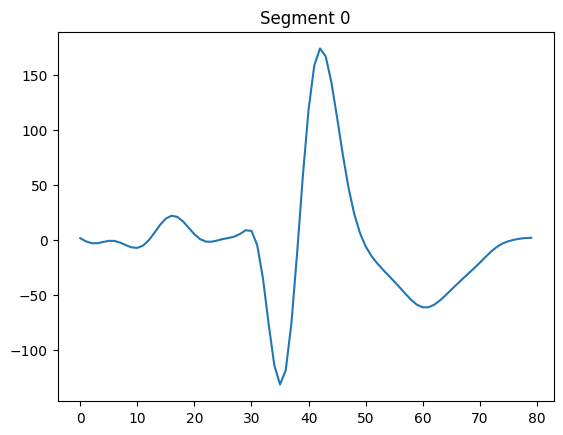

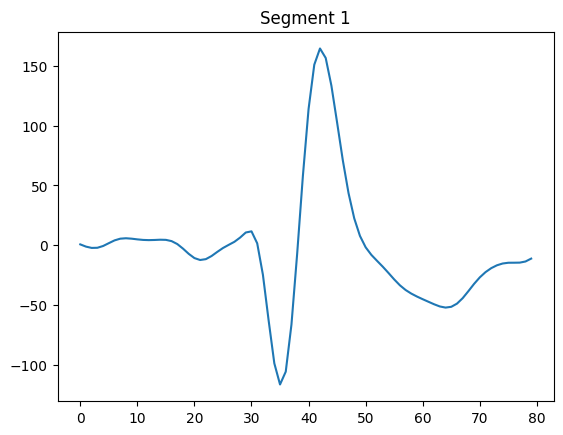

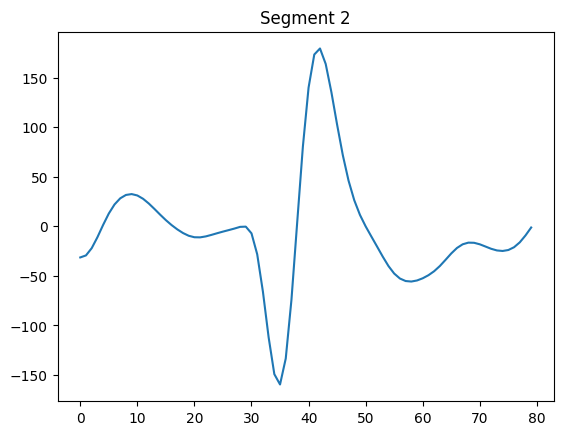

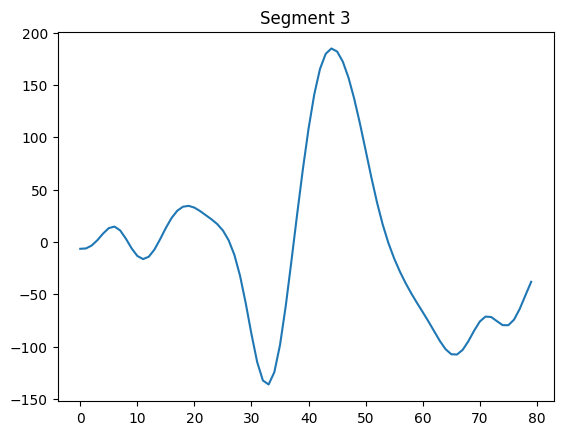

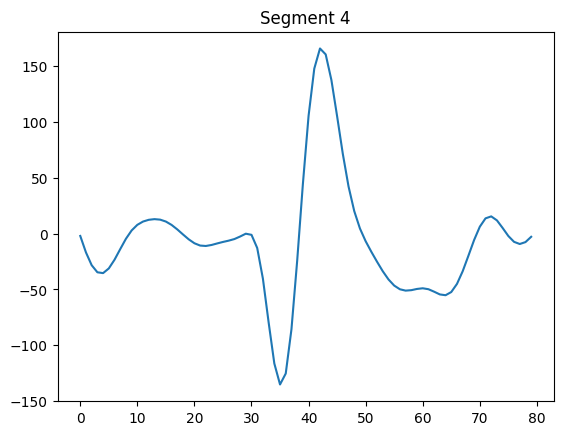

In [49]:
import matplotlib.pyplot as plt

n = 5
for i in range(n):
    index = np.random.randint(len(A))
    plt.plot(A[index])
    plt.title(f"Segment {i}")
    plt.show()


B

In [50]:
Y = []

for curve in A:
    max_i = np.argmax(curve)
    compare = max_i - 25
    if compare > 0:
        start = compare
    else:
        start = 0

    if len(curve) < max_i + 25:
        end = len(curve)
    else:
        end = max_i + 25
    if end - start == 50:
        Y.append(curve[start:end])

Y = np.array(Y)

Y.shape

(18330, 50)

C

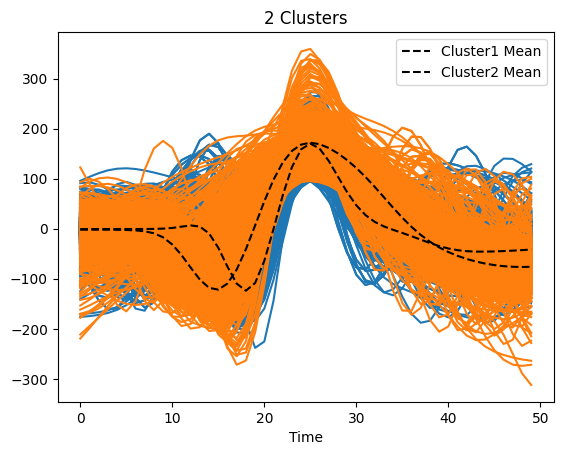

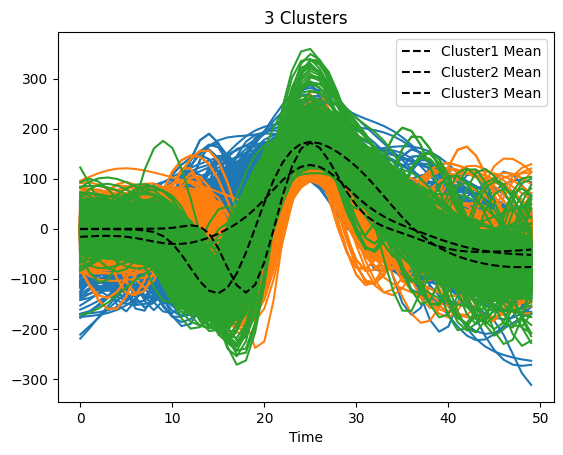

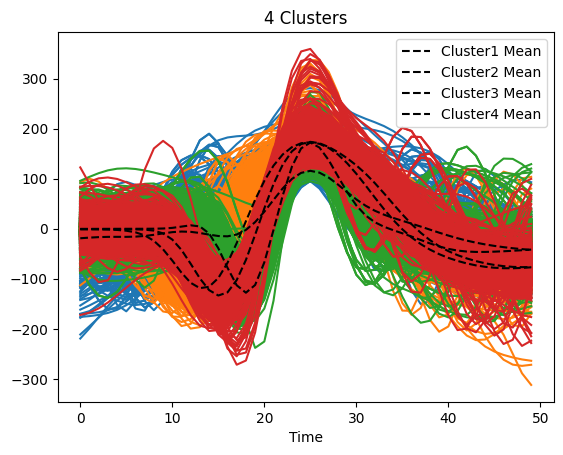

In [51]:
from sklearn.cluster import KMeans

clusters = [2, 3, 4]

for i in clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Y)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    plt.title(f"{i} Clusters")
    for j in range(i):
        index = np.where(labels == j)[0]
        for k in index:
            plt.plot(Y[k], color = f'C{j}')
        
    for x in range(i):
        plt.plot(centers[x], label = f"Cluster{x+1} Mean", linestyle='--', color = "black")
        
    plt.xlabel("Time")
    plt.legend()
    plt.show()


D

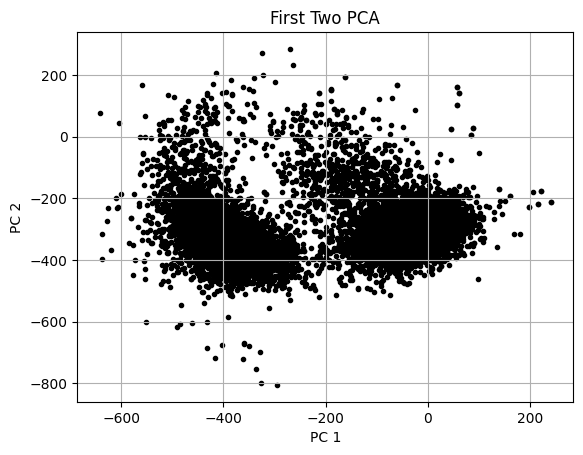

In [52]:
Y_center = Y - np.mean(Y.T)

covariance_mtx = np.cov(Y_center.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_mtx)

sort_i = np.argsort(eigenvalues)[::-1]
sort_eigvecs = eigenvectors[:, sort_i]

principal_components = sort_eigvecs[:, :2]
data = np.dot(Y_center, principal_components)

plt.scatter(data[:,0], data[:,1], marker = '.', color = 'black')
plt.title("First Two PCA")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()

E

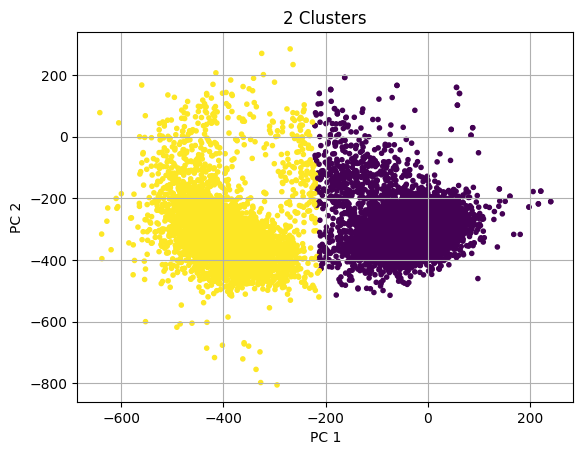

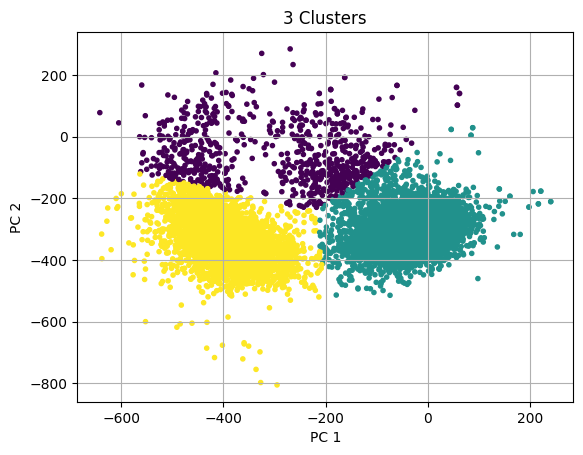

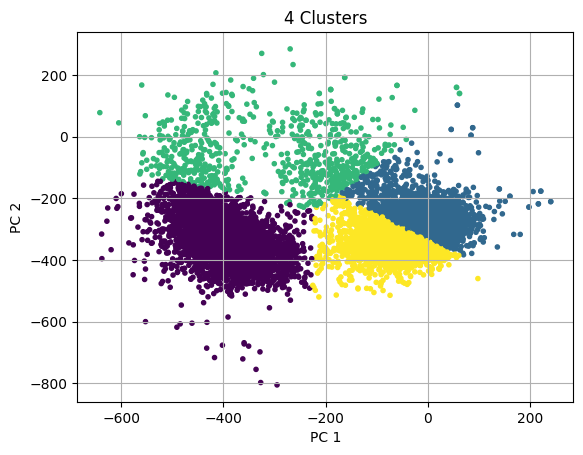

In [55]:
clusters = [2,3,4]


for i in clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='.')
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.grid("True")
    plt.title(f'{i} Clusters')
    plt.show()
    
    


F

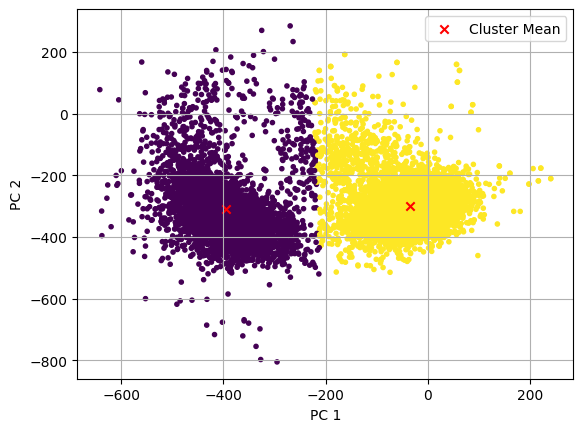

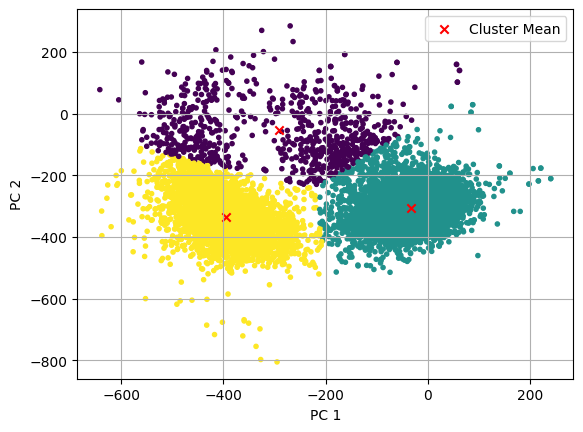

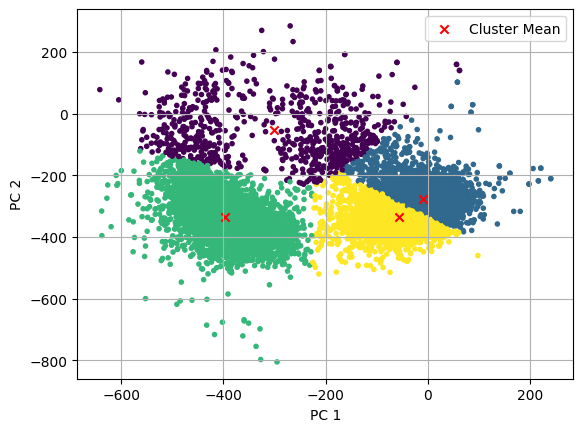

In [56]:
clusters = [2,3,4]


for i in clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='.')
    plt.scatter(centers[:, 0], centers[:, 1], marker = 'x', c='red', label = "Cluster Mean")
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.grid("True")
    plt.show()
    

In the PCA Clusters we can see which indivual area of the data is clustered while the original curves are much closer together.

In [ ]:
clusters = [2,3,4]


for i in clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='.')
    plt.scatter(centers[:, 0], centers[:, 1], marker = 'x', c='red', label = "Cluster Mean")
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.grid("True")
    plt.show()
    

Question 3

In [18]:
import numpy as np

mnist_data = np.load("MNIST_data.npy")
mnist_labels = np.load("MNIST_labels.npy")

mnist_data = mnist_data / 255
mnist_data.shape

(70000, 784)

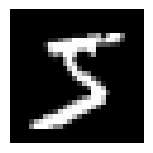

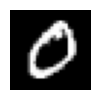

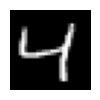

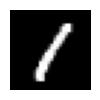

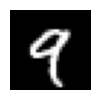

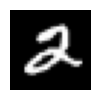

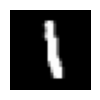

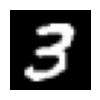

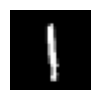

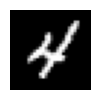

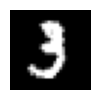

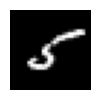

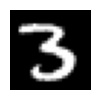

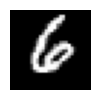

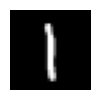

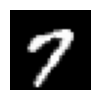

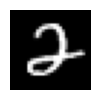

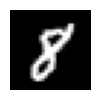

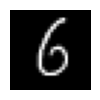

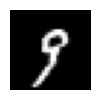

In [19]:
import matplotlib.pyplot as plt


examples = mnist_data[:20]

nrows = 4
ncols = 5
plt.figure(figsize=(ncols*2, nrows*2))
for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(examples[i].reshape((28,28)), cmap='gray')
    plt.axis('off')
    plt.show()

A

In [20]:
data_center = mnist_data - np.mean(mnist_data)

covariance_mtx = np.cov(data_center.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_mtx)

sorted_i = np.argsort(eigenvalues)[::-1]
sorted_vals = eigenvalues[sorted_i]
sorted_vecs = eigenvectors[:, sorted_i]

principal_components = sorted_vecs[:, :10]
data = np.dot(data_center, principal_components)


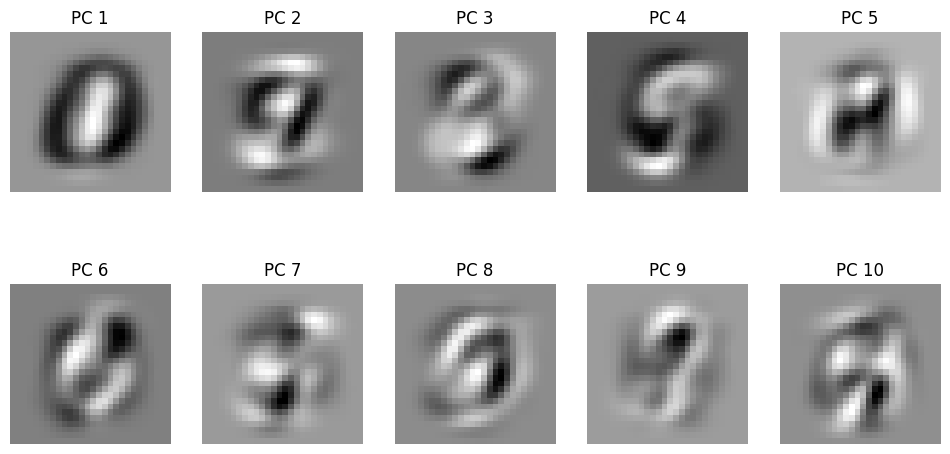

In [21]:
plt.figure(figsize=(12,6))
for i in range(10):
    pc_image = principal_components[:, i].reshape((28,28))
    pc_image = np.real(pc_image)
    plt.subplot(2,5, i+1)
    plt.imshow(pc_image, cmap='gray')
    plt.title(f'PC {i+1}')
    plt.axis('off')
plt.show()

B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


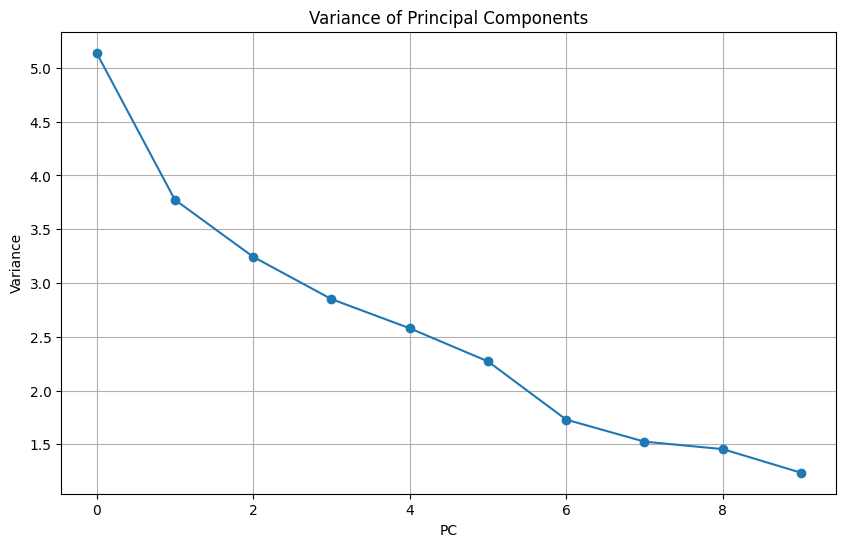

In [57]:
plt.figure(figsize=(10,6))
plt.plot(sorted_vals[:10],marker ='o',linestyle='-')
plt.title('Variance of Principal Components')
plt.xlabel('PC')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

C

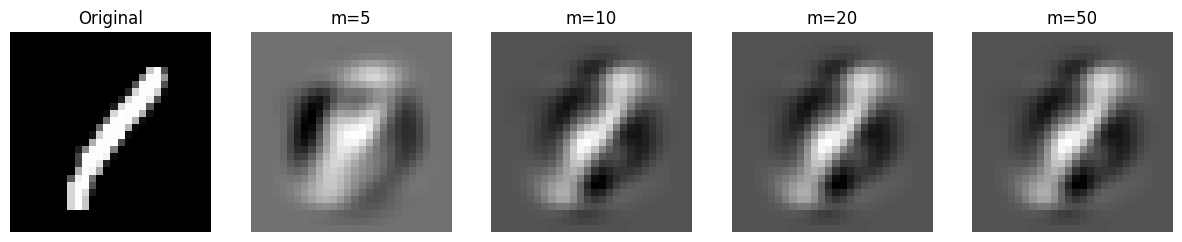

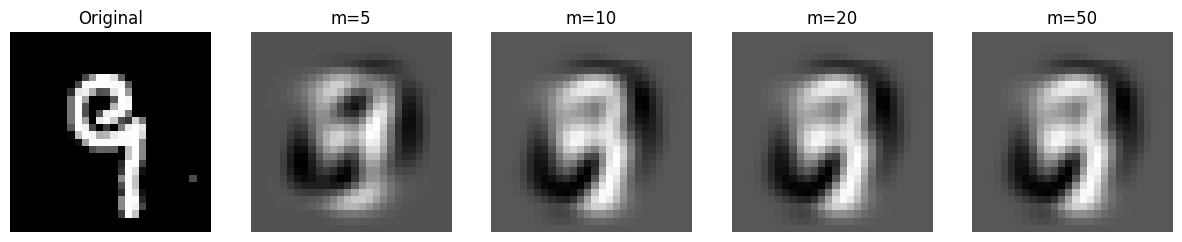

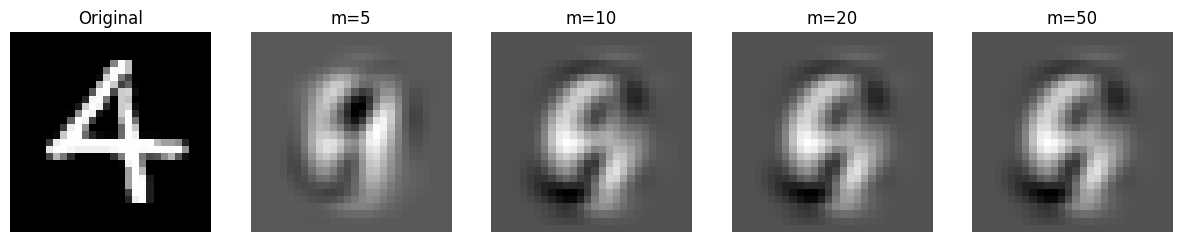

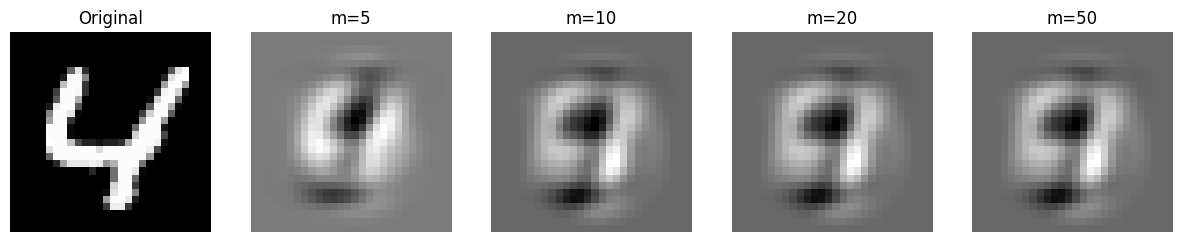

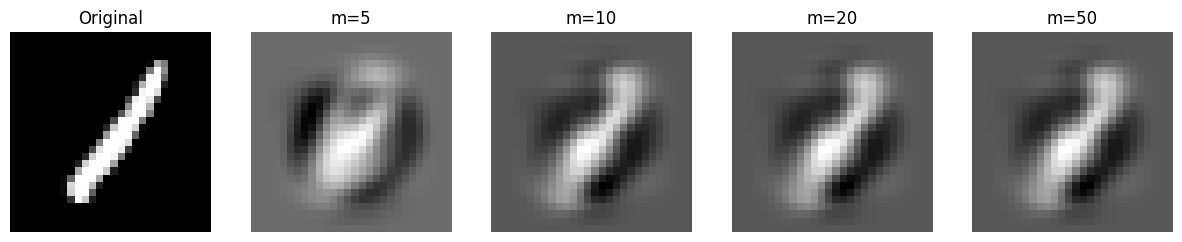

In [23]:
n = 5
test_idx = np.random.randint(0, len(mnist_data), size = n)
test_data_points = mnist_data[test_idx]

m_vals = [5,10,20,50]
mean = np.mean(mnist_data)

for i, point in enumerate(test_data_points):
    plt.figure(figsize = (15,3))
    plt.subplot(1, len(m_vals)+1, 1)
    plt.imshow(point.reshape((28,28)), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    for j,m in enumerate(m_vals):
        point_center = point - mean
        project_point = np.dot(point_center, principal_components[:, :m])
        reconstructed_point = np.dot(project_point, principal_components[:, :m].T) + mean
        reconstructed_point = np.real(reconstructed_point)

        plt.subplot(1, len(m_vals) + 1, j+2)
        plt.imshow(reconstructed_point.reshape((28,28)), cmap='gray')
        plt.title(f'm={m}')
        plt.axis('off')
    plt.show()
        
    

The results do give an acccurare representation of the images. As m increases the images get clearer but the most significant difference is from m = 5 to m = 10. The top principal components are capturng the most important features of the image. This is why the image may not be clear because it is only getting the distinct features that make each number different rather than all the aspects that make up the image.

D

In [24]:
from sklearn.cluster import KMeans

labels_unique = np.unique(mnist_labels)

n = 50
kmeans = KMeans(n_clusters = n)
labels = kmeans.fit_predict(mnist_data)
unique_cluster_labels = np.unique(labels)

centers = kmeans.cluster_centers_

majority = []
for i in unique_cluster_labels:
    idx = np.where(unique_cluster_labels == i)[0]
    cluster_labels = mnist_labels[idx]
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    majority_label = np.argmax(counts)
    majority.append(majority_label)


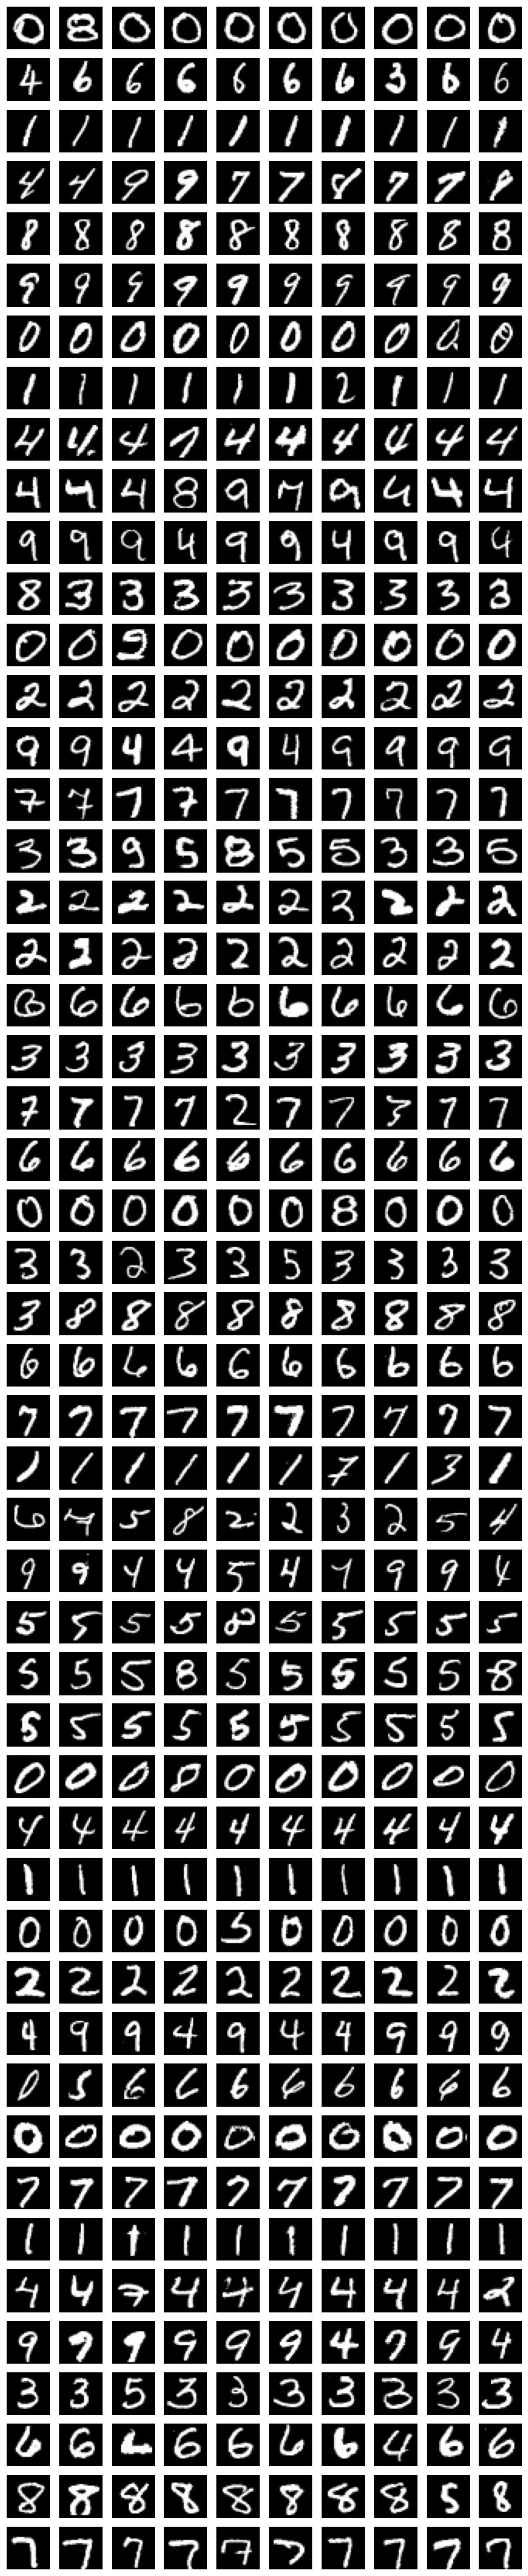

In [25]:
figure, row = plt.subplots(n, 10, figsize=(10, n))

for i, cluster in enumerate(unique_cluster_labels):
    idx = np.where(labels == cluster)[0]
    sample_idx = np.random.permutation(idx)
    sample = sample_idx[:10]
    for j, data in enumerate(sample):
        row[i,j].imshow(mnist_data[data].reshape(28,28), cmap='gray')
        row[i,j].axis('off')
plt.show()
    

The clusters labeled the numbers pretty well. It was able to get the majority label correct for each row and each row does have a majority number with only a few variations.

E

In [26]:
threshold = 0.5
binary_mnist_data = np.where(mnist_data >= threshold, 1, 0)
binary_mnist_data.shape

(70000, 784)

In [27]:
def calc_w(N, M):
    w = np.random.rand(N,M)
    w = w/(np.sum(w, axis = 1, keepdims = True))
    return w

In [28]:
def find_pi(w, binary, M, N):
    pi = (np.sum(w, axis = 0)+1)
    pi = pi/(M+N)
    pi = np.reshape(pi, (-1,1))
    p = np.matmul(w.T, binary)+1
    p = p/np.sum(p, axis = 1)+2
    return pi, p

In [29]:
def step(binary, w, p, pi):
    ln_p = np.log(p)
    ln_1_p = np.log(1-p)
    w = np.matmul(binary, (ln_p - ln_1_p).T)+np.sum(ln_1_p.T, axis = 0)+np.log(pi)
    return w
    


In [33]:
def maximizing(w, N):
    max_w = np.max(w, axis = 1)
    w = np.exp(w - max_w)
    return w

In [34]:
def responsibilities(w):
    w = w/ np.sum(w, axis = 1)
    return w

In [35]:
def calc_likelihood(w):
    L = np.mean(np.log(np.sum(np.exp(w), axis = 1)))
    return L

In [36]:

def emalgo(binary, M, iterations):
    N, d = binary.shape
    w = calc_w(N, M)
    L_new = 0
    i = 0
    for i in range(iterations):
        pi = find_pi(w, binary, M, N)
        w = step(binary, w, pi)
        L = L_new
        L_new = calc_likelihood(w)
        w = maximizing(w, N)
        w = responsibilities(w)
        pi, p = find_pi(w,binary, M, N)
        if i > 0 and (L_new - L)/np.abs(L) < 1e-4:
            break
    return (pi, p)
   

In [37]:
def plot_components(components, n, pi):
    rows = n // 5
    fig, axs = plt.subplots(n, 5, figsize = (12, n*2))

    for i, axes in enumerate(axs.flat):
        if i < n:
            img = components[i].reshape(28,28)
            axes.imshow(img, cmap='gray')
            axes.axis('off')
        else:
            axes.axis('off')

In [38]:
def visualize(p, pi, n, d):
    components = p.T[:, :n]
    plot_components(components, n, pi)


In [39]:
import matplotlib.pyplot as plt

M_lst = [10,20]
for m in M_lst:
    pi, p = emalgo(binary_mnist_data, m, 20)
    #visualize(p, pi, n = 10, d = 784)
    

/var/folders/7n/2gw6vndn2xx52y4np40qqw9c0000gn/T/ipykernel_49154/238344128.py:5: RuntimeWarning: invalid value encountered in log
  ln_1_p = np.log(1-p)
